<a href="https://colab.research.google.com/github/moon-2000/Art_of_Data_Visualization/blob/main/employee_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 8.2 Data Preprocessing

#### Data Exploration

The data exploration is the initial and most crucial phase as it serves as the primary and essential step in gaining insights into the dataset.     

This involves examining features, their respective data types, identifying missing values, detecting duplicate rows, analyzing statistical measures,
and exploring the distribution of unique values within each feature.

In [ ]:
# Reading the Excel file
raw_data = pd.read_excel("/content/drive/MyDrive/Employee/Employee_Attration_Dataset 12Des.xlsx")

# Displaying the shape of the dataframe (rows, columns)
print(raw_data.shape)

# Displaying the first few rows of the dataframe
print(raw_data.head())

(1191, 37)
   ID Attrition Gender         Age  Maritalstatus  Academic_degree   \
0  11       Yes  Female   31 to 40        Married          Master's   
1  12        No  Female  21 to 30          Single          Master's   
2  13        No  Female  21 to 30          Single        Bachelor's   
3  14        No  Female  21 to 30          Single        Bachelor's   
4  15        No  Female  21 to 30          Single        Bachelor's   

   Num_Companies_Worked                                   Years_Experience  \
0                     2                                  Less than 5 years   
1                     1   I did not work in other than the current orga...   
2                     1   I did not work in other than the current orga...   
3                     1   I did not work in other than the current orga...   
4                     1   I did not work in other than the current orga...   

  Years_experience_lastorganization            Sector  ... Distance_to_work  \
0             

In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(raw_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   ID                                          1191 non-null   int64 
 1   Attrition                                   1191 non-null   object
 2   Gender                                      1191 non-null   object
 3   Age                                         1191 non-null   object
 4    Maritalstatus                              1191 non-null   object
 5    Academic_degree                            1191 non-null   object
 6   Num_Companies_Worked                        1191 non-null   int64 
 7   Years_Experience                            1191 non-null   object
 8   Years_experience_lastorganization           1191 non-null   object
 9   Sector                                      1191 non-null   object
 10  Dep

In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(raw_data.describe())


Summary Statistics:
                ID  Num_Companies_Worked   Allowances
count  1191.000000           1191.000000  1191.000000
mean    612.910999              1.848866     1.222502
std     346.732295              1.243739     1.187483
min      11.000000              1.000000     0.000000
25%     314.500000              1.000000     0.000000
50%     613.000000              1.000000     1.000000
75%     912.500000              2.000000     2.000000
max    1213.000000              9.000000     4.000000


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(raw_data.isnull().sum())


Missing Values:
ID                                            0
Attrition                                     0
Gender                                        0
Age                                           0
 Maritalstatus                                0
 Academic_degree                              0
Num_Companies_Worked                          0
Years_Experience                              0
Years_experience_lastorganization             0
Sector                                        0
Department                                    0
JobTitle                                      0
MonthlySalary                                 0
Allowances                                    0
MedicalInsurance                              0
Bonus                                         0
OverTime                                      0
Payment_Overtime                              0
Rewards&Wages_Satisfaction                    0
Get_ Deserved_Promotion                       0
Training_programs_ Duri

In [ ]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(raw_data.duplicated().sum())


Duplicate Rows:
0


In [ ]:
# Display unique values in categorical columns
for column in raw_data.select_dtypes(include=['object']).columns:
    unique_values = raw_data[column].unique()
    print(f"\nUnique Values in {column}:\n")
    for i, value in enumerate(unique_values, 1):
        print(f"{i}. {value}")



Unique Values in Attrition:

1.  Yes
2.  No

Unique Values in Gender :

1. Female
2.  Male

Unique Values in Age:

1. 31 to 40
2. 21 to 30 
3. 41 to 50
4. 51 to 60 

Unique Values in  Maritalstatus:

1.  Married
2.  Single
3. Married
4.  Divorced

Unique Values in  Academic_degree :

1.  Master's
2.  Bachelor's
3. Diploma or secondary
4. Ph.D
5. Bachelor's

Unique Values in Years_Experience:

1.  Less than 5 years
2.  I did not work in other than the current organization
3.  From 5 to 10 years
4. From 16 to 20 years
5.  From 11 to 15 years
6. From 26 to 30 years
7. From 21 to 25 years

Unique Values in Years_experience_lastorganization:

1.  Less than 5 years
2. From 5 to 10 years
3.  From 11 to 15 years
4.  From 16 to 20 years
5. From 21 to 25 years
6.  From 31 to 35 years
7. From 26 to 30 years

Unique Values in Sector:

1. Medical sector
2. Education sector
3. Communications and IT sector
4. Tourism sector
5. Financial sector
6. Economic sector
7. Transport sector
8. Food productio

### 8.2.1 Data Cleaning

Data cleaning is a vital step in the process to prevent unexpected and undesirable outcomes. This stage encompasses addressing missing values, eliminating unnecessary columns, and renaming columns as needed, checking the feature distribution and target imbalance, ensuring the dataset is prepared for subsequent analyses.

In [ ]:
"""
Removing extra spaces before each feature unique values
"""
# Loop through categorical columns and remove extra spaces
for col in raw_data.select_dtypes(include='object').columns:
    raw_data[col] = raw_data[col].str.replace('\s+', ' ', regex=True).str.strip()

# Check the unique values after removing extra spaces
for col in raw_data.select_dtypes(include='object').columns:
    unique_values = raw_data[col].unique()
    print(f"\nUnique Values in {col}:\n")
    for i, value in enumerate(unique_values, 1):
        print(f"{i}. {value}")


Unique Values in Attrition:

1. Yes
2. No

Unique Values in Gender :

1. Female
2. Male

Unique Values in Age:

1. 31 to 40
2. 21 to 30
3. 41 to 50
4. 51 to 60

Unique Values in  Maritalstatus:

1. Married
2. Single
3. Divorced

Unique Values in  Academic_degree :

1. Master's
2. Bachelor's
3. Diploma or secondary
4. Ph.D

Unique Values in Years_Experience:

1. Less than 5 years
2. I did not work in other than the current organization
3. From 5 to 10 years
4. From 16 to 20 years
5. From 11 to 15 years
6. From 26 to 30 years
7. From 21 to 25 years

Unique Values in Years_experience_lastorganization:

1. Less than 5 years
2. From 5 to 10 years
3. From 11 to 15 years
4. From 16 to 20 years
5. From 21 to 25 years
6. From 31 to 35 years
7. From 26 to 30 years

Unique Values in Sector:

1. Medical sector
2. Education sector
3. Communications and IT sector
4. Tourism sector
5. Financial sector
6. Economic sector
7. Transport sector
8. Food production sector
9. Industry sector
10. Media secto

In [ ]:
import re
import pandas as pd

"""
This part of the code shortens some values in certain columns to make them easily visualizable
"""
# Define a dictionary for replacements
replacement_dict = {
    'Training_programs_ During_last_three_years': {
        re.compile(r'From 7 training programs to more'): '7 or more',
        re.compile(r'Less than 3 training programs'): 'Less than 3',
        re.compile(r'From 3 to 6 training programs'): '3 to 6',
        re.compile(r'From 1 to 3 training programs'): '1 to 3',
        re.compile(r'I did not receive any training'): 'No trainings',
        re.compile(r'From 4 to 6 training programs'): '4 to 6'
    },
    'Years_Experience': {
        re.compile(r'I did not work.*'): 'No Other Experience',
        re.compile(r'Less than 5 years'): 'Less than 5 years',
        re.compile(r'From 5 to 10 years'): '5 to 10 years',
        re.compile(r'From 11 to 15 years'): '11 to 15 years',
        re.compile(r'From 16 to 20 years'): '16 to 20 years',
        re.compile(r'From 21 to 25 years'): '21 to 25 years',
        re.compile(r'From 31 to 35 years'): '31 to 35 years',
        re.compile(r'From 26 to 30 years'): '26 to 30 years'
    },
    'MonthlySalary': {
        re.compile(r'From 5000 to 10000 S.R'): '5k to 10k S.R',
        re.compile(r'From 11000 to 15000 S.R'): '11k to 15k S.R',
        re.compile(r'Less than 5000 SAR'): 'Less than 5k SAR',
        re.compile(r'From 16000 to 20000 S.R'): '16k to 20k S.R',
        re.compile(r'S.R 31000 - and more'): '31k and more',
        re.compile(r'From 21000 to 25000 S.R'): '21k to 25k S.R',
        re.compile(r'From 26000 to 30000 S.R'): '26k to 30k S.R'
    },
    'Years_experience_lastorganization': {
        re.compile(r'Less than 5 years'): 'Less than 5 years',
        re.compile(r'From 5 to 10 years'): '5 to 10 years',
        re.compile(r'From 11 to 15 years'): '11 to 15 years',
        re.compile(r'From 16 to 20 years'): '16 to 20 years',
        re.compile(r'From 21 to 25 years'): '21 to 25 years',
        re.compile(r'From 31 to 35 years'): '31 to 35 years',
        re.compile(r'From 26 to 30 years'): '26 to 30 years'
    },
    'Business_Travel': {re.compile(r'I do not travel for work'): 'No Travel Work'},
    'Payment_Overtime': {re.compile(r"I don't have overtime"): 'No Overtime'}
}

# Apply replacements using the loop
for column, patterns in replacement_dict.items():
    for pattern, replacement in patterns.items():
        raw_data[column] = raw_data[column].replace(pattern, replacement, regex=True)

# Check the unique values after replacement
print(raw_data['Years_Experience'].unique())
print(raw_data['Business_Travel'].unique())
print(raw_data['Payment_Overtime'].unique())
print(raw_data['Training_programs_ During_last_three_years'].unique())
print(raw_data['Years_experience_lastorganization'].unique())
print(raw_data['MonthlySalary'].unique())


['Less than 5 years' 'No Other Experience' '5 to 10 years'
 '16 to 20 years' '11 to 15 years' '26 to 30 years' '21 to 25 years']
['No Travel Work' 'Travel rarely' 'Travel frequently']
['No Overtime' 'No' 'Yes']
['1 to 3' 'No trainings' '4 to 6' '7 or more']
['Less than 5 years' '5 to 10 years' '11 to 15 years' '16 to 20 years'
 '21 to 25 years' '31 to 35 years' '26 to 30 years']
['5k to 10k S.R' '11k to 15k S.R' 'Less than 5k SAR' '16k to 20k S.R'
 '31k and more' '21k to 25k S.R' '26k to 30k S.R']


In [ ]:
# Remove leading and trailing spaces from values for all columns
raw_data = raw_data.apply(lambda x: x.str.strip() if x.dtype == "O" else x)

# Standardize column names for all columns for spaces between the column name parts
raw_data.columns = raw_data.columns.str.replace(' ', '')

# Remove leading spaces from all column names
raw_data.columns = raw_data.columns.str.strip()

print(raw_data.columns)

Index(['ID', 'Attrition', 'Gender', 'Age', 'Maritalstatus', 'Academic_degree',
       'Num_Companies_Worked', 'Years_Experience',
       'Years_experience_lastorganization', 'Sector', 'Department', 'JobTitle',
       'MonthlySalary', 'Allowances', 'MedicalInsurance', 'Bonus', 'OverTime',
       'Payment_Overtime', 'Rewards&Wages_Satisfaction',
       'Get_Deserved_Promotion', 'Training_programs_During_last_three_years',
       'Useful_Training_Programs', 'Business_Travel', 'Job_Support',
       'Recognition', 'Emotional_Commitment', 'Job_Engagement',
       'Distance_to_work', 'Work_Live_Balance', 'Physical_Stress',
       'Psychological_Exhaustion', 'Job_Stability', 'Health_Issues',
       'Environment_Satisfaction', 'Job_Satisfaction', 'Job_Opportunities',
       'Intention_to_Leave'],
      dtype='object')


##### Features Distributions

<ipython-input-12-305cf5126abb>:20: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.8, left = 0.4)


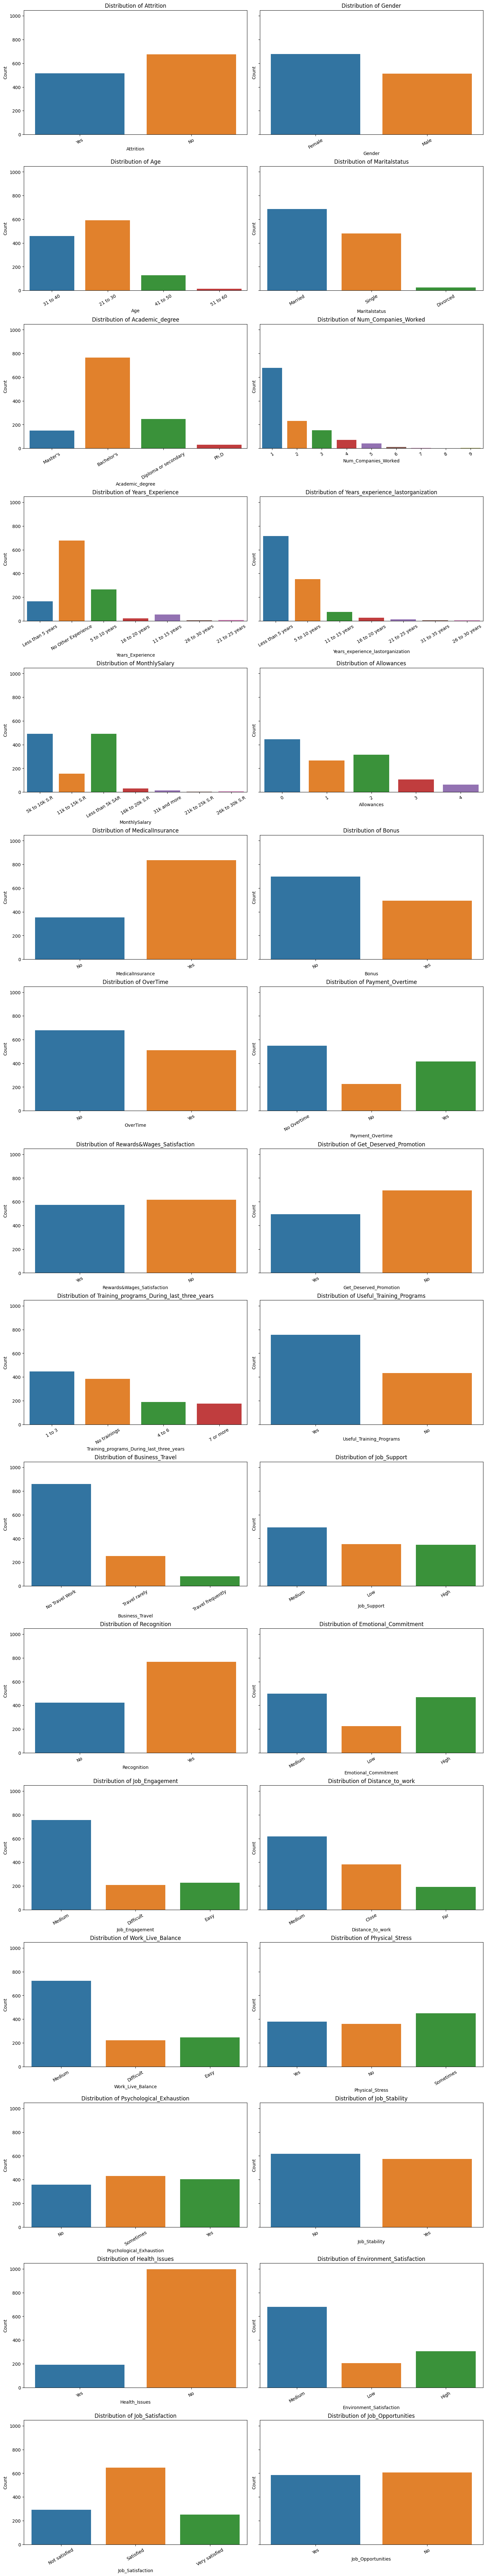

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Get the list of columns (excluding ID and target)
feature_columns = [col for col in raw_data.columns if col not in ['ID', 'Intention_to_Leave']]

# Filter features with 9 or fewer unique values
selected_feature_columns = [col for col in feature_columns if len(raw_data[col].unique()) <= 9]

# Calculate the number of rows and columns for the subplot grid
num_columns = len(selected_feature_columns)
num_rows = (num_columns // 2) + (1 if num_columns % 2 != 0 else 0)  # Adjusted to avoid empty plots

# Create a subplot grid
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5), sharey=True, constrained_layout=True)

# Add space between rows
plt.subplots_adjust(hspace=0.8, left = 0.4)

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop through each feature column and create a distribution plot
for i, column in enumerate(selected_feature_columns):
        # Categorical data, use a count plot without specifying 'y'
        sns.countplot(x=raw_data[column], ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels


# Show the plot
plt.show()


##### Checking Data Imbalance

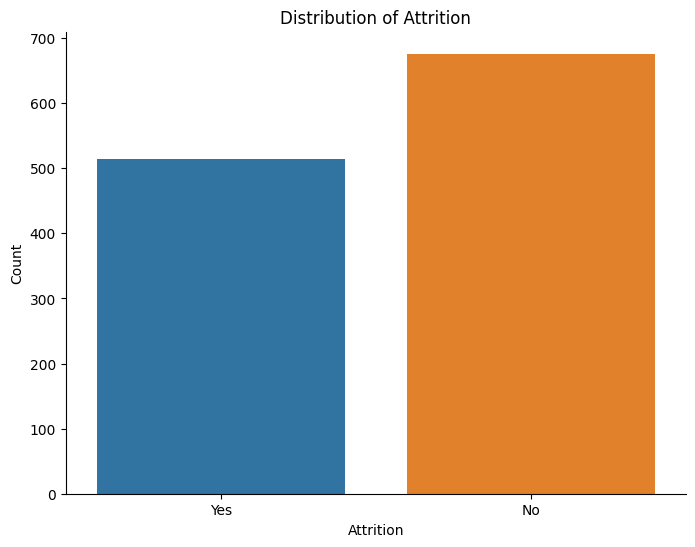

In [ ]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=raw_data)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')

# Remove top and right borders
sns.despine()

# Show the distribution
plt.show()

### 8.2.2 Encoding of Categorical Data

Categorical variables/features are any feature type can be classified into two major
types:   
• Nominal    
• Ordinal   
Nominal variables:   
* are variables that have two or more categories which do not
have any kind of order associated with them. For example, if gender is classified into two groups, i.e. male and female, it can be considered as a nominal variable.       

Ordinal variables:
* have “levels” or categories with a particular
order associated with them. For example, an ordinal categorical variable can be a feature with three different levels: low, medium and high. Order is important.

LabelEncoder from scikit-learn does not handle NaN values, and ord_2 column has NaN values in it.
- NaN values should be handled before using it     
- We can use this encoder directly in many tree-based models:
• Decision trees
• Random forest
• Extra Trees
• Or any kind of boosted trees model
o XGBoost
o GBM
o LightGBM      
Oridnal example:         
Freezing 0     
Cold     1    
Warm     2    
Hot      3    
Very Hot 4   
This type of encoding cannot be used in linear models, support vector machines or neural networks as they expect data to be normalized (or standardized).   
For these types of models, we can binarize the data. (001, 101, 000, etc). But this takes a lot of memory space.

One hot encoding:             
  If you look carefully, you will see that there are six
categories, as mentioned before. When one-hot encoding, the vector size has to be same as the number of categories.         

In [ ]:
# print(len(raw_data.columns))  # 37
# print(raw_data.columns)
print(len(raw_data.select_dtypes(include=['object']).columns))  # 34
print(raw_data.select_dtypes(include=['object']).columns)


34
Index(['Attrition', 'Gender', 'Age', 'Maritalstatus', 'Academic_degree',
       'Years_Experience', 'Years_experience_lastorganization', 'Sector',
       'Department', 'JobTitle', 'MonthlySalary', 'MedicalInsurance', 'Bonus',
       'OverTime', 'Payment_Overtime', 'Rewards&Wages_Satisfaction',
       'Get_Deserved_Promotion', 'Training_programs_During_last_three_years',
       'Useful_Training_Programs', 'Business_Travel', 'Job_Support',
       'Recognition', 'Emotional_Commitment', 'Job_Engagement',
       'Distance_to_work', 'Work_Live_Balance', 'Physical_Stress',
       'Psychological_Exhaustion', 'Job_Stability', 'Health_Issues',
       'Environment_Satisfaction', 'Job_Satisfaction', 'Job_Opportunities',
       'Intention_to_Leave'],
      dtype='object')


#### Encoding Nominal Categorical Features

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 743.2 kB/s eta 0:00:00


In [ ]:
Nominal_Columns = ['Intention_to_Leave', 'Job_Opportunities', 'Job_Stability', 'Health_Issues', 'Recognition',
                   'Useful_Training_Programs', 'Get_Deserved_Promotion', 'Rewards&Wages_Satisfaction',
                   'OverTime', 'Bonus', 'MedicalInsurance', 'Gender', 'Attrition']

Ordinal_Columns = ['Job_Satisfaction', 'Environment_Satisfaction', 'Psychological_Exhaustion',
                   'Physical_Stress','Work_Live_Balance', 'Distance_to_work', 'Job_Engagement',
                   'Emotional_Commitment', 'Job_Support', 'Business_Travel', 'Training_programs_During_last_three_years',
                   'Payment_Overtime', 'MonthlySalary', 'Years_experience_lastorganization',
                   'Years_Experience', 'Academic_degree', 'Age']

# https://datascience.stackexchange.com/questions/64460/strategies-to-encode-categorical-variables-with-many-categories

In [ ]:
from sklearn.preprocessing import LabelEncoder

processed_columns = []

for col in Nominal_Columns:
    print(f"{col}: {raw_data[col].unique()}")
    processed_columns.append(col)

label_encoder = LabelEncoder()

for col in Nominal_Columns:
    # Encode 'Yes' or 'Male' as 1, 'No' or 'Female' as 0
    raw_data[col] = label_encoder.fit_transform(raw_data[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}))

# Display the unique values after label encoding
for col in Nominal_Columns:
    print(f"{col}: {raw_data[col].unique()}")

Intention_to_Leave: ['Yes' 'No']
Job_Opportunities: ['Yes' 'No']
Job_Stability: ['No' 'Yes']
Health_Issues: ['Yes' 'No']
Recognition: ['No' 'Yes']
Useful_Training_Programs: ['Yes' 'No']
Get_Deserved_Promotion: ['Yes' 'No']
Rewards&Wages_Satisfaction: ['Yes' 'No']
OverTime: ['No' 'Yes']
Bonus: ['No' 'Yes']
MedicalInsurance: ['No' 'Yes']
Gender: ['Female' 'Male']
Attrition: ['Yes' 'No']
Intention_to_Leave: [1 0]
Job_Opportunities: [1 0]
Job_Stability: [0 1]
Health_Issues: [1 0]
Recognition: [0 1]
Useful_Training_Programs: [1 0]
Get_Deserved_Promotion: [1 0]
Rewards&Wages_Satisfaction: [1 0]
OverTime: [0 1]
Bonus: [0 1]
MedicalInsurance: [0 1]
Gender: [0 1]
Attrition: [1 0]


#### Encoding Ordinal Categorical Features


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Specify logical order for ordinal columns
ordinal_order = {
    'Job_Satisfaction': ['Not satisfied', 'Satisfied', 'Very satisfied'],
    'Environment_Satisfaction': ['Low', 'Medium', 'High'],
    'Work_Live_Balance': ['Easy', 'Medium', 'Difficult'],
    'Distance_to_work': ['Close', 'Medium', 'Far'],
    'Job_Engagement': ['Easy', 'Medium', 'Difficult'],
    'Emotional_Commitment': ['Low', 'Medium', 'High'],
    'Job_Support': ['Low', 'Medium','High'],
    'Payment_Overtime': ['No Overtime', 'No', 'Yes'],
    'Psychological_Exhaustion': ['No', 'Sometimes', 'Yes'],
    'Physical_Stress': ['No', 'Sometimes', 'Yes'],
    'Business_Travel': ['No Travel Work', 'Travel rarely', 'Travel frequently'],
    'Training_programs_During_last_three_years': [ 'No trainings', '1 to 3', '4 to 6', '7 or more'],
    'MonthlySalary': ['Less than 5k SAR', '5k to 10k S.R', '11k to 15k S.R',  '16k to 20k S.R', '21k to 25k S.R', '26k to 30k S.R', '31k and more'],
    'Years_experience_lastorganization': ['Less than 5 years', '5 to 10 years', '11 to 15 years', '16 to 20 years', '21 to 25 years', '26 to 30 years', '31 to 35 years'],
    'Years_Experience': ['No Other Experience', 'Less than 5 years', '5 to 10 years', '11 to 15 years', '16 to 20 years', '21 to 25 years', '26 to 30 years'],
    'Academic_degree': ['Diploma or secondary', "Bachelor's",  "Master's", 'Ph.D'],
    'Age': ['21 to 30','31 to 40',  '41 to 50', '51 to 60']
}



ordinal_columns = list(ordinal_order.keys())
processed_columns = processed_columns  + ordinal_columns

# Display the unique values before encoding
before_encoding = {col: raw_data[col].unique() for col in ordinal_columns}

# Encoding with Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[ordinal_order[col] for col in ordinal_columns])
raw_data[ordinal_columns] = ordinal_encoder.fit_transform(raw_data[ordinal_columns])

# Display the unique values after encoding
after_encoding = {col: raw_data[col].unique() for col in ordinal_columns}

# Display the unique values after encoding

for col in ordinal_columns:
    print(f"{col}: | (Before Encoding): {before_encoding[col]} | (After Encoding): {after_encoding[col]}")

Job_Satisfaction: | (Before Encoding): ['Not satisfied' 'Satisfied' 'Very satisfied'] | (After Encoding): [0. 1. 2.]
Environment_Satisfaction: | (Before Encoding): ['Medium' 'Low' 'High'] | (After Encoding): [1. 0. 2.]
Work_Live_Balance: | (Before Encoding): ['Medium' 'Difficult' 'Easy'] | (After Encoding): [1. 2. 0.]
Distance_to_work: | (Before Encoding): ['Medium' 'Close' 'Far'] | (After Encoding): [1. 0. 2.]
Job_Engagement: | (Before Encoding): ['Medium' 'Difficult' 'Easy'] | (After Encoding): [1. 2. 0.]
Emotional_Commitment: | (Before Encoding): ['Medium' 'Low' 'High'] | (After Encoding): [1. 0. 2.]
Job_Support: | (Before Encoding): ['Medium' 'Low' 'High'] | (After Encoding): [1. 0. 2.]
Payment_Overtime: | (Before Encoding): ['No Overtime' 'No' 'Yes'] | (After Encoding): [0. 1. 2.]
Psychological_Exhaustion: | (Before Encoding): ['No' 'Sometimes' 'Yes'] | (After Encoding): [0. 1. 2.]
Physical_Stress: | (Before Encoding): ['Yes' 'No' 'Sometimes'] | (After Encoding): [2. 0. 1.]
Busine

In [ ]:
import category_encoders as ce

# Since there is no inherent order or ranking 'Maritalstatus' among 'Single,' 'Married,' and 'Divorced,
# Print the a sub DataFrame before encoding
print(raw_data.iloc[415:421, 4:6])

"""
'Single':   1 0
'Married':  0 1
'Divorced': 1 1
"""
# Create an instance of BinaryEncoder
encoder = ce.BinaryEncoder(cols=['Maritalstatus'])

# Fit and transform the encoder on your data
raw_data = encoder.fit_transform(raw_data)
new_Marital_columns = ['Maritalstatus_0', 'Maritalstatus_1']
processed_columns = processed_columns + new_Marital_columns

# Print the resulting DataFrame
print(raw_data.iloc[415:421, 4:6])


    Maritalstatus  Academic_degree
415      Divorced              1.0
416       Married              0.0
417      Divorced              0.0
418        Single              0.0
419       Married              1.0
420        Single              1.0
     Maritalstatus_0  Maritalstatus_1
415                1                1
416                0                1
417                1                1
418                1                0
419                0                1
420                1                0


In [ ]:
import category_encoders as ce

# Select categorical columns for LeaveOneOut encoding due to the many uniques values that each Feature have
columns_to_encode = ['JobTitle', 'Department', 'Sector']
processed_columns = processed_columns  + columns_to_encode


# Print a slice of the dataset before encoding
print("Before Encoding:")
print(raw_data[columns_to_encode].head())

# Create the LeaveOneOutEncoder
encoder = ce.LeaveOneOutEncoder(cols=columns_to_encode)

# Fit and transform the encoder on your data
raw_data = encoder.fit_transform(raw_data, raw_data['Attrition'])

# Print a slice of the dataset after encoding
print("\nAfter Encoding:")
print(raw_data[columns_to_encode].head())


Before Encoding:
     JobTitle  Department            Sector
0  Accountant  Accounting    Medical sector
1  Accountant  Accounting    Medical sector
2     Teacher    Teaching  Education sector
3     Teacher    Teaching  Education sector
4     Teacher    Teaching  Education sector

After Encoding:
   JobTitle  Department    Sector
0  0.619048    0.603175  0.369637
1  0.642857    0.619048  0.372937
2  0.195122    0.233696  0.266667
3  0.195122    0.233696  0.266667
4  0.195122    0.233696  0.266667


### 8.2.3 Feature Scaling

In [ ]:
# Select only numeric columns
numeric_columns = [col for col in raw_data.columns if col not in processed_columns]
# Remove 'ID' from the list
numeric_columns.remove('ID')

# Print or use the selected numeric columns
print(numeric_columns)
for col in numeric_columns:
  print(f"{col}: {raw_data[col].unique()}")

['Num_Companies_Worked', 'Allowances']
Num_Companies_Worked: [2 1 4 3 5 7 6 8 9]
Allowances: [2 0 1 4 3]


In [ ]:
for col in numeric_columns:
    X_min = raw_data[col].min()
    X_max = raw_data[col].max()
    raw_data[col] = (raw_data[col] - X_min) / (X_max - X_min)

# Print the normalized DataFrame
for col in numeric_columns:
  print(f"{col}: {raw_data[col].unique()}")

Num_Companies_Worked: [0.125 0.    0.375 0.25  0.5   0.75  0.625 0.875 1.   ]
Allowances: [0.5  0.   0.25 1.   0.75]


### 8.2.4 Data Splitting

Stratified k-fold cross-validation is used when there is an imbalance in the distribution of the target classes within the dataset as shown previously in the checking target imbalance section.         

In a standard k-fold cross-validation, the dataset is divided into k folds, and in each iteration, one of the folds is used as the validation set while the remaining folds are used for training. However, if the target classes are imbalanced, meaning some classes are underrepresented compared to others, this simple random partitioning may lead to biased and suboptimal performance evaluations.

The key motivation behind using stratified k-fold cross-validation is to ensure that each fold maintains the same class distribution as the original dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Drop the 'ID' column
raw_data = raw_data.drop('ID', axis=1)

# Separate features (X) and target variable (y)
X = raw_data.drop('Attrition', axis=1)
y = raw_data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Stratified K-fold for Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Specify the number of folds for cross-validation
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)


## 8.3 Feature Selection

#### 8.3.1 Select KBest

Given that we have a relatively small dataset with 1119 samples and 38 features, achieving perfect accuracy scores for all values of k might indicate overfitting, especially with complex models like Random Forest or SVM. That's why Logistic regression is used here to inspect the peroformance

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

KBest_feature_selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector on your data
X_selected = KBest_feature_selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = KBest_feature_selector.get_support(indices=True)

# Get the names of the selected features (assuming X is a DataFrame)
KBest_feature_names = X.columns[selected_feature_indices]

# Print the selected feature indices and names
print("Selected Feature Indices:", selected_feature_indices)
print("\nSelected Feature Names:", KBest_feature_names)

Selected Feature Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]

Selected Feature Names: Index(['Gender', 'Age', 'Maritalstatus_0', 'Maritalstatus_1',
       'Academic_degree', 'Num_Companies_Worked', 'Years_Experience',
       'Years_experience_lastorganization', 'Sector', 'Department', 'JobTitle',
       'MonthlySalary', 'Allowances', 'MedicalInsurance', 'Bonus', 'OverTime',
       'Payment_Overtime', 'Rewards&Wages_Satisfaction',
       'Get_Deserved_Promotion', 'Training_programs_During_last_three_years',
       'Useful_Training_Programs', 'Business_Travel', 'Job_Support',
       'Recognition', 'Emotional_Commitment', 'Job_Engagement',
       'Distance_to_work', 'Work_Live_Balance', 'Physical_Stress',
       'Psychological_Exhaustion', 'Job_Stability', 'Health_Issues',
       'Environment_Satisfaction', 'Job_Satisfaction', 'Job_Opportunities',
       'Intention_to_Leave'],
      dtype='object')


#### 8.3.2 Information Gain (IG)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

IG_feature_selector = mutual_info_classif(X_train, y_train)

# Print or use the information gain scores for each feature
for feature, score in zip(X.columns, IG_feature_selector):
    print(f"{feature}: {score}")

# Select all features with non-zero information gain scores
non_zero_IG_indices = IG_feature_selector.nonzero()[0]
IG_feature_names = X.columns[non_zero_IG_indices]

# Print or use the selected features
print("\nSelected Features based on Information Gain:")
print(IG_feature_names)


Gender: 0.0
Age: 0.0
Maritalstatus_0: 0.0
Maritalstatus_1: 0.009835096953244138
Academic_degree: 0.0
Num_Companies_Worked: 0.6807237313611754
Years_Experience: 0.681248941445209
Years_experience_lastorganization: 0.061092182288984054
Sector: 0.6571962707320232
Department: 0.6579830871844176
JobTitle: 0.5369075625024606
MonthlySalary: 0.009615056436622416
Allowances: 0.011236518264486905
MedicalInsurance: 0.005821240279352935
Bonus: 0.010226649049737135
OverTime: 0.0
Payment_Overtime: 0.0
Rewards&Wages_Satisfaction: 0.03160227483186784
Get_Deserved_Promotion: 0.011045320350003829
Training_programs_During_last_three_years: 0.05533264555252693
Useful_Training_Programs: 0.011093520011137725
Business_Travel: 0.0
Job_Support: 0.06277810424714558
Recognition: 0.012024541460015303
Emotional_Commitment: 0.01589322998945164
Job_Engagement: 0.01787078749094273
Distance_to_work: 0.0
Work_Live_Balance: 0.02061491366732504
Physical_Stress: 0.01035044059638457
Psychological_Exhaustion: 0.0
Job_Stabil

#### 8.3.3 Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

# Create the RFE instance
RFE_feature_selector = RFE(estimator=classifier, n_features_to_select=None)

# Fit the selector on your data
X_selected = RFE_feature_selector.fit_transform(X_train, y_train)

# Get the mask of the selected features
selected_feature_mask = RFE_feature_selector.support_

# Get the names of the selected features
RFE_feature_names = X.columns[selected_feature_mask]

# Print the selected feature mask and names
print("Selected Feature Mask:", selected_feature_mask)
print("\nSelected Feature Names:", RFE_feature_names)

Selected Feature Mask: [False False False False False  True  True  True  True  True  True False
  True False False False False  True  True  True False False  True False
  True False  True  True False False  True False False  True  True  True]

Selected Feature Names: Index(['Num_Companies_Worked', 'Years_Experience',
       'Years_experience_lastorganization', 'Sector', 'Department', 'JobTitle',
       'Allowances', 'Rewards&Wages_Satisfaction', 'Get_Deserved_Promotion',
       'Training_programs_During_last_three_years', 'Job_Support',
       'Emotional_Commitment', 'Distance_to_work', 'Work_Live_Balance',
       'Job_Stability', 'Job_Satisfaction', 'Job_Opportunities',
       'Intention_to_Leave'],
      dtype='object')


8.3.4 Sequential Feature Selection (SFS)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
import pandas as pd

# Create a RandomForestClassifier
classifier = LogisticRegression(penalty='l2', C=10.0)

# Create the SequentialFeatureSelector instance
SFS_feature_selector = SequentialFeatureSelector(classifier, n_features_to_select='auto', direction='forward', scoring="roc_auc", cv=5)

# Fit the selector on your training data
SFS_feature_selector = SFS_feature_selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = SFS_feature_selector.get_support()

# Get the names of the selected features from your DataFrame X
SFS_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Feature Names:", SFS_feature_names)

Selected Feature Names: Index(['Gender', 'Maritalstatus_0', 'Maritalstatus_1', 'Academic_degree',
       'Num_Companies_Worked', 'Sector', 'Department', 'MonthlySalary',
       'MedicalInsurance', 'Bonus', 'OverTime', 'Payment_Overtime',
       'Rewards&Wages_Satisfaction', 'Get_Deserved_Promotion',
       'Training_programs_During_last_three_years', 'Useful_Training_Programs',
       'Physical_Stress', 'Job_Stability'],
      dtype='object')


## 8.4 Modeling Process

### 8.4.1 Machine Learning Based Predictive models

#### Logistic Regression (LR)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
import pandas as pd


# Create a Logistic Regression classifier
classifier = LogisticRegression(penalty='l2', C=10.0)

# Feature selection strategies
strategies = {
    'All Features': slice(None),  # Select all features
    'SelectKBest': SelectKBest(k='all'),
    'InformationGain': SelectKBest(mutual_info_classif, k='all'),
    'RFE': RFE(estimator=classifier, n_features_to_select=None),
    'SFS': SequentialFeatureSelector(classifier, n_features_to_select='auto', direction='forward', scoring="roc_auc", cv=skf)

}

# Metrics to calculate
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

# Iterate through each feature selection strategy
for name, selector in strategies.items():
    # If 'All Features', no need to create a selector
    if name == 'All Features':
        selected_features = X.columns
    else:
        # Create a pipeline with the feature selector and classifier
        pipeline = make_pipeline(selector, classifier)

        # Fit the pipeline on the entire dataset
        pipeline.fit(X, y)

        # Get the indices of the selected features
        selected_feature_indices = selector.get_support(indices=True)

        # Get the names of the selected features
        selected_features = X.columns[selected_feature_indices]

    # Perform cross-validation
    scores = cross_val_score(classifier, X[selected_features], y, cv=skf, scoring='accuracy')

    # Initialize dictionaries to store metric values
    metric_values = {metric: [] for metric in metrics}

    # Iterate through each fold
    for train_index, test_index in skf.split(X[selected_features], y):
        X_train, X_test = X[selected_features].iloc[train_index], X[selected_features].iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Predict on the test set
        y_pred = classifier.predict(X_test)

        # Calculate metrics
        for metric_name, metric_func in metrics.items():
            metric_values[metric_name].append(metric_func(y_test, y_pred))

    # Print the results
    print(f"\nResults for {name}:")
    for metric_name, metric_func in metrics.items():
        print(f"{metric_name}: {sum(metric_values[metric_name]) / len(metric_values[metric_name]):.4f}")



Results for All Features:
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.9981
F1 Score: 0.9990

Results for SelectKBest:
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.9981
F1 Score: 0.9990

Results for InformationGain:
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.9981
F1 Score: 0.9990

Results for RFE:
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.9981
F1 Score: 0.9990

Results for SFS:
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.9981
F1 Score: 0.9990


#### Decision trees (DT)

#### Support Vector Machine (SVM)

#### k-nearest neighbors (KNN)

### 8.4.2 Ensemble Learning Based Predictive models

#### XGBoost

#### Random Forest

#### Voting Classifier

## Performance Comparison